In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

In [86]:
teams_df = pd.read_csv('data/2025/mens_prem_teams.csv')
teams_df

,Club ID,Club
0,175308,ALLIANCE UNITED MEN
1,175320,BURLINGTON SC MEN
2,175382,FC LONDON MEN
3,175337,NORTH TORONTO MEN
4,183404,OAKVILLE SC MEN
5,175349,SCROSOPPI FC MEN
6,175355,SIGMA FC MEN
7,175358,SIMCOE COUNTY ROVERS FC MEN
8,175397,ST CATHARINES ROMA MEN
9,175294,VAUGHAN AZZURRI MEN


In [87]:
scores_df = pd.read_csv('data/2025/2025-06-28_mens_prem_results.csv')
scores_df


,Match ID,Home result,Away result,Home team,Away team
0,261884769,0,1,175358,175349
1,261884770,2,2,175382,175308
2,261884771,1,0,183404,175320
3,261884772,4,1,175294,175397
4,261884773,2,0,175349,175355
5,261884774,3,1,175397,175337
6,261884775,3,1,175358,175320
7,261884776,1,0,175367,183404
8,261884777,2,5,175294,175308
9,261884778,0,2,175382,175294


In [88]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [89]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           ALLIANCE UNITED MEN  BURLINGTON SC MEN  FC LONDON MEN  NORTH TORONTO MEN  OAKVILLE SC MEN  SCROSOPPI FC MEN  SIGMA FC MEN  SIMCOE COUNTY ROVERS FC MEN  ST CATHARINES ROMA MEN  VAUGHAN AZZURRI MEN  WOODBRIDGE STRIKERS MEN
261884769                    0                  0              0                  0                0                 1             0                           -1                       0                    0                        0
261884770                   -1                  0              1                  0                0                 0             0                            0                       0                    0                        0
261884771                    0                 -1              0                  0                1                 0             0                            0                       0                    0                        0
261884772                    0                  0              0        

In [90]:
print(X_df.T.to_string())

                             261884769  261884770  261884771  261884772  261884773  261884774  261884775  261884776  261884777  261884778  261884779  261884780  261884781  261884782  261884783  261884784  261884785  261884786  261884787  261884788  261884789  261884790  261884791  261884792  261884793  261884794  261884795  261884796  261884797  261884798  261884799  261884800  261884801  261884802  261884803  261884804  261884805  261884806  261884807  261884808  261884809  261884810  261884811  261884812  261884813  261884814  261884815  261884816  261884817  261884818  261884819  261884820  261884821  261884822  261884823  261884824  261884849
ALLIANCE UNITED MEN                  0         -1          0          0          0          0          0          0          1          0          0          0          0         -1          0          1          0          0          0          0          0          0          1          0          0          0          0          1          

In [91]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                             ALLIANCE UNITED MEN  BURLINGTON SC MEN  FC LONDON MEN  NORTH TORONTO MEN  OAKVILLE SC MEN  SCROSOPPI FC MEN  SIGMA FC MEN  SIMCOE COUNTY ROVERS FC MEN  ST CATHARINES ROMA MEN  VAUGHAN AZZURRI MEN  WOODBRIDGE STRIKERS MEN
ALLIANCE UNITED MEN                           12                 -2             -1                 -2                0                -2            -2                           -1                       0                   -1                       -1
BURLINGTON SC MEN                             -2                 10             -1                  0               -1                 0            -2                           -1                      -2                    0                       -1
FC LONDON MEN                                 -1                 -1             10                  0               -1                -2            -2                           -1                       0                   -2                        0


In [92]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                             ALLIANCE UNITED MEN  BURLINGTON SC MEN  FC LONDON MEN  NORTH TORONTO MEN  OAKVILLE SC MEN  SCROSOPPI FC MEN  SIGMA FC MEN  SIMCOE COUNTY ROVERS FC MEN  ST CATHARINES ROMA MEN  VAUGHAN AZZURRI MEN  WOODBRIDGE STRIKERS MEN
ALLIANCE UNITED MEN                           12                 -2             -1                 -2                0                -2            -2                           -1                       0                   -1                       -1
BURLINGTON SC MEN                             -2                 10             -1                  0               -1                 0            -2                           -1                      -2                    0                       -1
FC LONDON MEN                                 -1                 -1             10                  0               -1                -2            -2                           -1                       0                   -2                        0


In [93]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                             GD
ALLIANCE UNITED MEN           6
BURLINGTON SC MEN             3
FC LONDON MEN               -16
NORTH TORONTO MEN           -12
OAKVILLE SC MEN               4
SCROSOPPI FC MEN              5
SIGMA FC MEN                 -9
SIMCOE COUNTY ROVERS FC MEN   7
ST CATHARINES ROMA MEN       -1
VAUGHAN AZZURRI MEN           4
WOODBRIDGE STRIKERS MEN       0


In [94]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                             GD with limited blowouts
ALLIANCE UNITED MEN                                 6
BURLINGTON SC MEN                                   2
FC LONDON MEN                                     -13
NORTH TORONTO MEN                                 -11
OAKVILLE SC MEN                                     4
SCROSOPPI FC MEN                                    3
SIGMA FC MEN                                       -8
SIMCOE COUNTY ROVERS FC MEN                         7
ST CATHARINES ROMA MEN                             -1
VAUGHAN AZZURRI MEN                                 3
WOODBRIDGE STRIKERS MEN                             0


In [95]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                             massey_rating
WOODBRIDGE STRIKERS MEN           1.233643
SIMCOE COUNTY ROVERS FC MEN       0.646516
SCROSOPPI FC MEN                  0.404089
OAKVILLE SC MEN                   0.356605
ALLIANCE UNITED MEN               0.325963
BURLINGTON SC MEN                 0.265851
ST CATHARINES ROMA MEN            0.173550
VAUGHAN AZZURRI MEN               0.048512
NORTH TORONTO MEN                -0.889853
SIGMA FC MEN                     -1.012409
FC LONDON MEN                    -1.552468


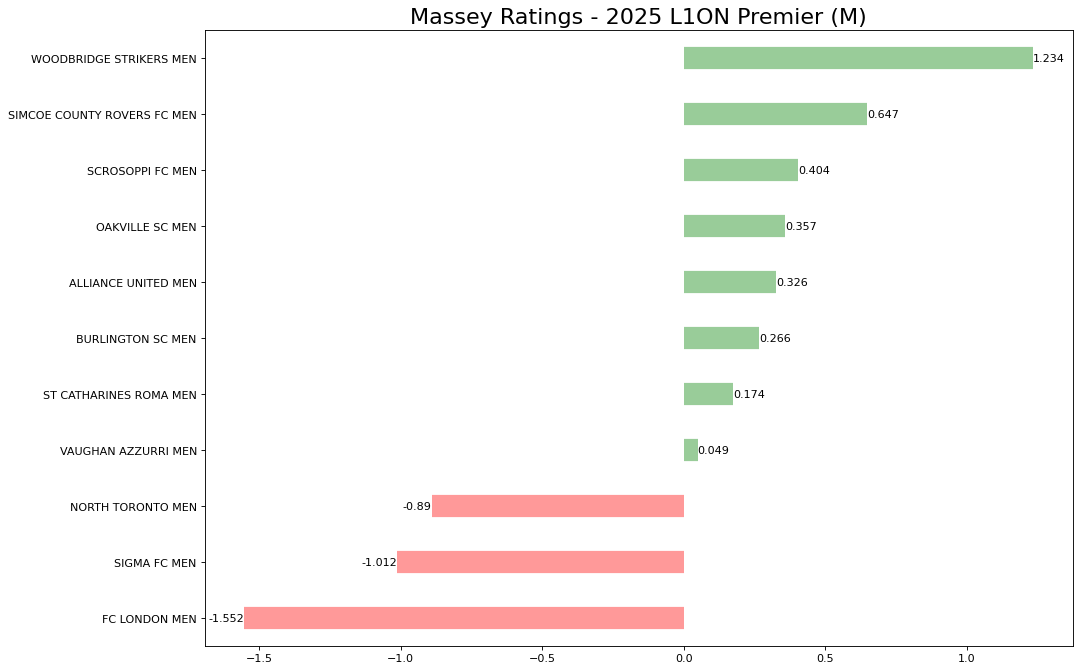

In [96]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Premier (M)', fontdict={
          'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [97]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                             massey_rating
WOODBRIDGE STRIKERS MEN           1.093679
SIMCOE COUNTY ROVERS FC MEN       0.631491
OAKVILLE SC MEN                   0.368405
ALLIANCE UNITED MEN               0.324061
SCROSOPPI FC MEN                  0.228414
BURLINGTON SC MEN                 0.192199
ST CATHARINES ROMA MEN            0.134249
VAUGHAN AZZURRI MEN               0.013428
NORTH TORONTO MEN                -0.801445
SIGMA FC MEN                     -0.903721
FC LONDON MEN                    -1.280760


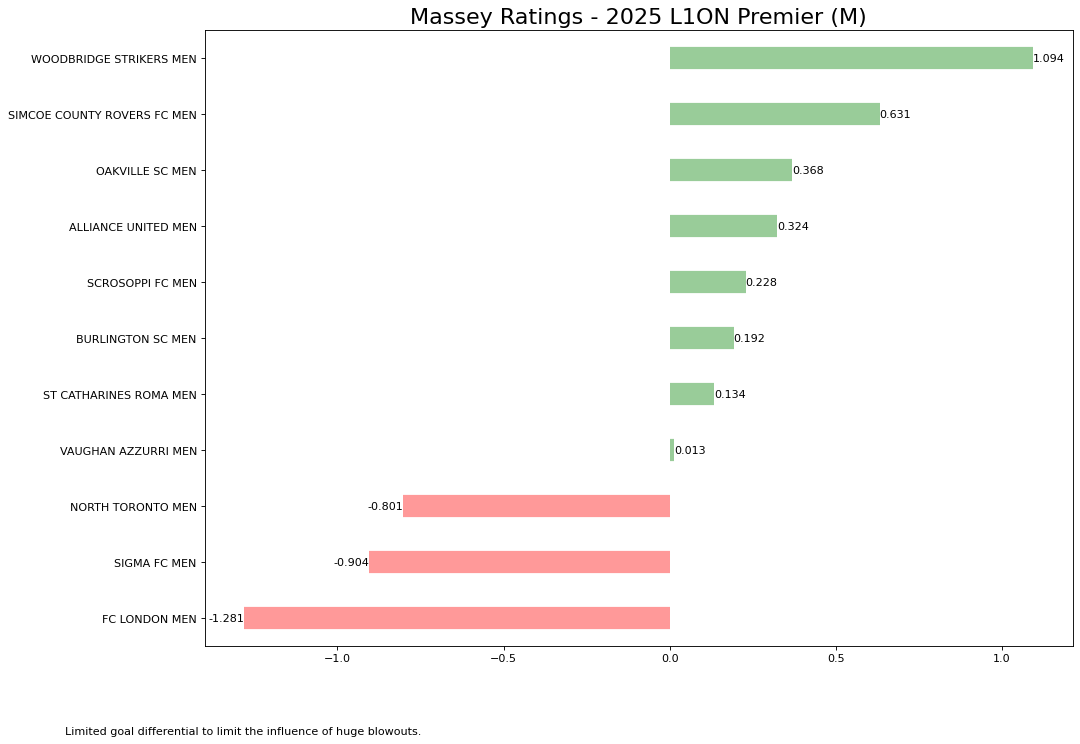

In [98]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title('Massey Ratings - 2025 L1ON Premier (M)', fontdict={'size': 20})
plt.figtext(s='Limited goal differential to limit the influence of huge blowouts.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()